# video_into_photos:

In [1]:
# Importing all necessary libraries
import cv2
import os


In [ ]:

# Read the video from specified path and save them in train and test folders:
cam_banana = cv2.VideoCapture("banana.mp4")
cam_orange = cv2.VideoCapture("orange.mp4")
try:
	if not os.path.exists('data'):
		os.makedirs('data')
except OSError:
	print ('Error: Creating directory of data')
currentframe = 0
while(True):
	ret,frame = cam_banana.read()
	if ret:
		name = './fruits/data/train/Banana/Banana' + str(currentframe) + '.jpg'
		print ('Creating...' + name)
		if currentframe>=500:
			name = './fruits/data/test/Banana/Banana' + str(currentframe) + '.jpg'
		if currentframe<600:
			frame = cv2.resize(frame, (400,800))
			cv2.imwrite(name, frame)
		currentframe += 1
	else:
		break
cam_banana.release()
currentframe = 0
while(True):
	ret,frame = cam_orange.read()
	if ret:
		name = './fruits/data/train/Orange/Orange' + str(currentframe) + '.jpg'
		print ('Creating...' + name)
		if currentframe>=500:
			name = './fruits/data/test/Orange/Orange' + str(currentframe) + '.jpg'
		if currentframe<600:
			frame = cv2.resize(frame, (400,800))
			cv2.imwrite(name, frame)
		currentframe += 1
	else:
		break
cam_orange.release()
cv2.destroyAllWindows()

# Feed Forward Neural Network ANN:

In [50]:
# Importing the needed libraries:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import numpy as np


In [74]:
# importing the data generated from the webcam for the fruits to use it later in the model:
image_size = 400
image_size_2 = 800
batch_size= 30
data_generator = ImageDataGenerator(preprocessing_function = None)
train_generator = data_generator.flow_from_directory(
    'fruits/data/train',
    target_size=(image_size, image_size_2),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
    'fruits/data/test',
    target_size=(image_size, image_size_2),
    batch_size=batch_size,
    class_mode='categorical')

Found 1000 images belonging to 2 classes.


Found 200 images belonging to 2 classes.


In [75]:
# preparing model layers for the classification problem:
model = Sequential([
    Flatten(input_shape=(image_size, image_size_2, 3)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 960000)            0         
                                                                 
 dense_17 (Dense)            (None, 32)                30720032  
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 2)                 34        
                                                                 
Total params: 30,720,594
Trainable params: 30,720,594
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Compile the model using adam optimizer and Categorial corss entropy as a loss function:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
# Train the model on the training and validation images imported earlier:
history = model.fit_generator(train_generator,
                            validation_data=validation_generator,
                            steps_per_epoch=train_generator.n//train_generator.batch_size,
                            validation_steps=validation_generator.n//validation_generator.batch_size,
                            epochs=10)

C:\Users\tarek\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
33/33 [==============================] - 18s 532ms/step - loss: 110634.6719 - accuracy: 0.8464 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
33/33 [==============================] - 16s 479ms/step - loss: 0.4101 - accuracy: 0.9990 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
33/33 [==============================] - 16s 481ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
33/33 [==============================] - 17s 505ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
33/33 [==============================] - 16s 499ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
33/33 [==============================] - 17s 501ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
33/33 [==============================] - 17s 515ms/step - loss: 0.0000e+00 - accuracy:

In [78]:
# Import the needed libraries:
import matplotlib.pyplot as plt

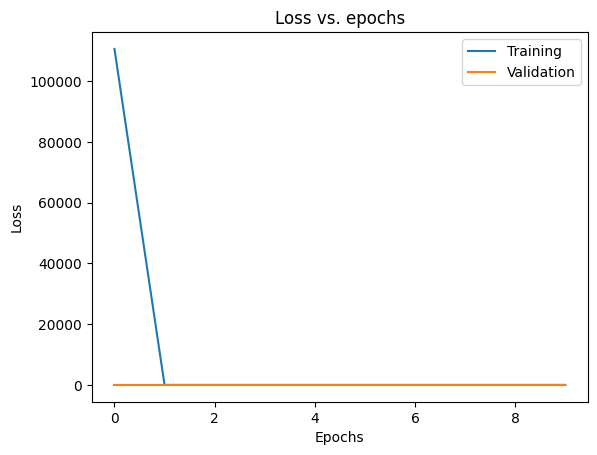

In [79]:
# Plotting the training loss and validation loss using matplotlib
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [80]:
# printing the loss and accuracy of the model using evaluate:
model.evaluate(validation_generator)

7/7 [==============================] - 1s 167ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [87]:
model.save('./fruits/ANN_model/ANN.h5')

1/1 [==============================] - 0s 59ms/step
Creating..../fruits/data/live/ANN/Banana10.jpg
class: 0
1/1 [==============================] - 0s 35ms/step
Creating..../fruits/data/live/ANN/Banana9.jpg
class: 1
1/1 [==============================] - 0s 25ms/step
Creating..../fruits/data/live/ANN/Banana8.jpg
class: 1
1/1 [==============================] - 0s 24ms/step
Creating..../fruits/data/live/ANN/Banana7.jpg
class: 0
1/1 [==============================] - 0s 25ms/step
Creating..../fruits/data/live/ANN/Banana6.jpg
class: 0
1/1 [==============================] - 0s 27ms/step
Creating..../fruits/data/live/ANN/Banana5.jpg
class: 0
1/1 [==============================] - 0s 25ms/step
Creating..../fruits/data/live/ANN/Banana4.jpg
class: 0
1/1 [==============================] - 0s 22ms/step
Creating..../fruits/data/live/ANN/Banana3.jpg
class: 0
1/1 [==============================] - 0s 22ms/step
Creating..../fruits/data/live/ANN/Banana2.jpg
class: 0
1/1 [==============================]

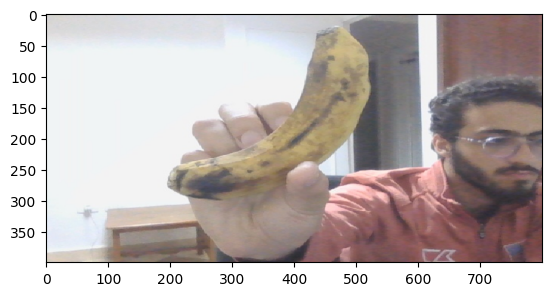

In [82]:
# Predicting the class of the test image using ANN model we have now and show the image as well: "Banana testing"
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import time
cam_banana_live=cv2.VideoCapture(0)

i=10
m=0
success_of_banana_index = 0
success_of_banana=0
for m in range(10):
    frame = cam_banana_live.read()[1]
    name = './fruits/data/live/ANN/Banana'+str(i)+'.jpg'
    cv2.imwrite(name, frame)
    frame = cv2.resize(frame, (400,800))
    img=image.load_img(name, target_size=(400,800))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    predictions=model.predict(x)
    print ('Creating...' + name)
    i-=1
    print('class:',np.argmax(predictions[0]))
    time.sleep(1)
    if np.argmax(predictions[0]) == success_of_banana_index:
        success_of_banana+=1
    else:
        continue 
    
print(success_of_banana)
cam_banana_live.release()
cv2.destroyAllWindows()
plt.imshow(img)

1/1 [==============================] - 0s 25ms/step
Creating..../fruits/data/live/ANN/Orange10.jpg
class: 1
1/1 [==============================] - 0s 23ms/step
Creating..../fruits/data/live/ANN/Orange9.jpg
class: 1
1/1 [==============================] - 0s 23ms/step
Creating..../fruits/data/live/ANN/Orange8.jpg
class: 1
1/1 [==============================] - 0s 23ms/step
Creating..../fruits/data/live/ANN/Orange7.jpg
class: 1
1/1 [==============================] - 0s 24ms/step
Creating..../fruits/data/live/ANN/Orange6.jpg
class: 1
1/1 [==============================] - 0s 22ms/step
Creating..../fruits/data/live/ANN/Orange5.jpg
class: 0
1/1 [==============================] - 0s 34ms/step
Creating..../fruits/data/live/ANN/Orange4.jpg
class: 0
1/1 [==============================] - 0s 27ms/step
Creating..../fruits/data/live/ANN/Orange3.jpg
class: 1
1/1 [==============================] - 0s 22ms/step
Creating..../fruits/data/live/ANN/Orange2.jpg
class: 0
1/1 [==============================]

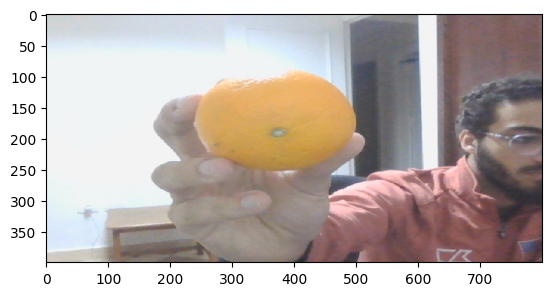

In [85]:
# Predicting the class of the test image using ANN model we have now and show the image as well: "Orange testing"
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import time
cam_banana_live=cv2.VideoCapture(0)

i=10
m=0
success_of_orange_index = 1
success_of_orange=0
for m in range(10):
    frame = cam_banana_live.read()[1]
    name = './fruits/data/live/ANN/Orange'+str(i)+'.jpg'
    cv2.imwrite(name, frame)
    frame = cv2.resize(frame, (400,800))
    img=image.load_img(name, target_size=(400,800))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    predictions=model.predict(x)
    print ('Creating...' + name)
    i-=1
    print('class:',np.argmax(predictions[0]))
    time.sleep(1)
    if np.argmax(predictions[0]) == success_of_orange_index:
        success_of_orange+=1
    else:
        continue 
    
print(success_of_orange)
cam_banana_live.release()
cv2.destroyAllWindows()
plt.imshow(img)

In [86]:
#Success rate
ANN_success_rate=(success_of_banana + success_of_orange)/20
print(ANN_success_rate)

0.7


# Convloutional Neural Network CNN:

In [1]:
# importing the needed libraries:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# importing the data generated from the webcam for the fruits to use it later in the model:
image_size = 400
image_size_2 = 800
batch_size= 30
data_generator = ImageDataGenerator(preprocessing_function = None)
train_generator = data_generator.flow_from_directory(
    'fruits/data/train',
    target_size=(image_size, image_size_2),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
    'fruits/data/test',
    target_size=(image_size, image_size_2),
    batch_size=batch_size,
    class_mode='categorical')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(8, (2, 2), activation='relu', input_shape=(image_size, image_size_2, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 399, 799, 8)       104       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 133, 266, 8)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 283024)            0         
                                                                 
 dense_2 (Dense)             (None, 16)                4528400   
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                      

In [8]:
# Compile the model using adam optimizer and Categorial corss entropy as a loss function:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model on the training and validation images imported earlier:
history = model.fit_generator(train_generator,
                            validation_data=validation_generator,
                            steps_per_epoch=train_generator.n//train_generator.batch_size,
                            validation_steps=validation_generator.n//validation_generator.batch_size,
                            epochs=10)

C:\Users\tarek\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
33/33 [==============================] - 24s 713ms/step - loss: 3507.2583 - accuracy: 0.6959 - val_loss: 0.5212 - val_accuracy: 0.6333
Epoch 2/10
33/33 [==============================] - 22s 675ms/step - loss: 0.5347 - accuracy: 0.5423 - val_loss: 0.6249 - val_accuracy: 0.4889
Epoch 3/10
33/33 [==============================] - 22s 663ms/step - loss: 0.4512 - accuracy: 0.7856 - val_loss: 0.6618 - val_accuracy: 0.6500
Epoch 4/10
33/33 [==============================] - 22s 665ms/step - loss: 0.4028 - accuracy: 0.8320 - val_loss: 0.5915 - val_accuracy: 0.6889
Epoch 5/10
33/33 [==============================] - 22s 673ms/step - loss: 0.3782 - accuracy: 0.8433 - val_loss: 0.6459 - val_accuracy: 0.6667
Epoch 6/10
33/33 [==============================] - 22s 672ms/step - loss: 0.3621 - accuracy: 0.8474 - val_loss: 0.5993 - val_accuracy: 0.6778
Epoch 7/10
33/33 [==============================] - 22s 666ms/step - loss: 0.3508 - accuracy: 0.8515 - val_loss: 0.5705 - val_accuracy: 0.7

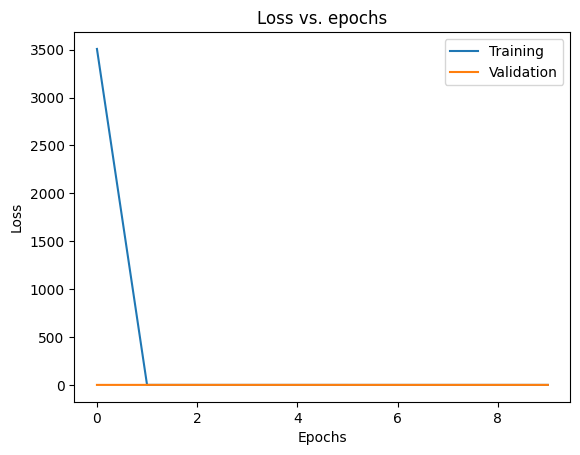

In [11]:
# Plotting the training loss and validation loss using matplotlib:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [12]:
# printing the loss and accuracy of the model using evaluate:
model.evaluate(validation_generator)

7/7 [==============================] - 2s 273ms/step - loss: 0.5364 - accuracy: 0.7450


[0.5364225506782532, 0.7450000047683716]

In [20]:
model.save('./fruits/CNN_model/CNN.h5')

1/1 [==============================] - 0s 25ms/step
Creating..../fruits/data/live/CNN/Banana10.jpg
class: 0
1/1 [==============================] - 0s 27ms/step
Creating..../fruits/data/live/CNN/Banana9.jpg
class: 0
1/1 [==============================] - 0s 32ms/step
Creating..../fruits/data/live/CNN/Banana8.jpg
class: 0
1/1 [==============================] - 0s 27ms/step
Creating..../fruits/data/live/CNN/Banana7.jpg
class: 0
1/1 [==============================] - 0s 25ms/step
Creating..../fruits/data/live/CNN/Banana6.jpg
class: 0
1/1 [==============================] - 0s 28ms/step
Creating..../fruits/data/live/CNN/Banana5.jpg
class: 1
1/1 [==============================] - 0s 25ms/step
Creating..../fruits/data/live/CNN/Banana4.jpg
class: 0
1/1 [==============================] - 0s 32ms/step
Creating..../fruits/data/live/CNN/Banana3.jpg
class: 0
1/1 [==============================] - 0s 26ms/step
Creating..../fruits/data/live/CNN/Banana2.jpg
class: 1
1/1 [==============================]

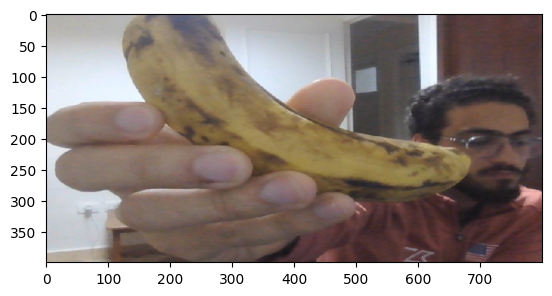

In [17]:
# Predicting the class of the test image using CNN model we have now and show the image as well: "Banana testing"
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import time
cam_banana_live=cv2.VideoCapture(0)

i=10
m=0
success_of_banana_index = 0
success_of_banana=0
for m in range(10):
    frame = cam_banana_live.read()[1]
    name = './fruits/data/live/CNN/Banana'+str(i)+'.jpg'
    cv2.imwrite(name, frame)
    frame = cv2.resize(frame, (400,800))
    img=image.load_img(name, target_size=(400,800))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    predictions=model.predict(x)
    print ('Creating...' + name)
    i-=1
    print('class:',np.argmax(predictions[0]))
    time.sleep(1)
    if np.argmax(predictions[0]) == success_of_banana_index:
        success_of_banana+=1
    else:
        continue 
    
print(success_of_banana)
cam_banana_live.release()
cv2.destroyAllWindows()
plt.imshow(img)

1/1 [==============================] - 0s 27ms/step
Creating..../fruits/data/live/CNN/Orange10.jpg
class: 1
1/1 [==============================] - 0s 32ms/step
Creating..../fruits/data/live/CNN/Orange9.jpg
class: 1
1/1 [==============================] - 0s 31ms/step
Creating..../fruits/data/live/CNN/Orange8.jpg
class: 0
1/1 [==============================] - 0s 26ms/step
Creating..../fruits/data/live/CNN/Orange7.jpg
class: 1
1/1 [==============================] - 0s 29ms/step
Creating..../fruits/data/live/CNN/Orange6.jpg
class: 1
1/1 [==============================] - 0s 27ms/step
Creating..../fruits/data/live/CNN/Orange5.jpg
class: 1
1/1 [==============================] - 0s 25ms/step
Creating..../fruits/data/live/CNN/Orange4.jpg
class: 1
1/1 [==============================] - 0s 24ms/step
Creating..../fruits/data/live/CNN/Orange3.jpg
class: 1
1/1 [==============================] - 0s 28ms/step
Creating..../fruits/data/live/CNN/Orange2.jpg
class: 1
1/1 [==============================]

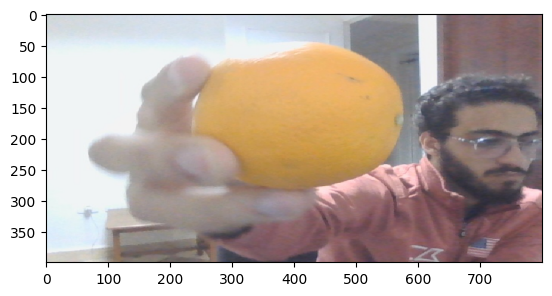

In [18]:
# Predicting the class of the test image using CNN model we have now and show the image as well: "Orange testing"
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import time
cam_banana_live=cv2.VideoCapture(0)

i=10
m=0
success_of_orange_index = 1
success_of_orange=0
for m in range(10):
    frame = cam_banana_live.read()[1]
    name = './fruits/data/live/CNN/Orange'+str(i)+'.jpg'
    cv2.imwrite(name, frame)
    frame = cv2.resize(frame, (400,800))
    img=image.load_img(name, target_size=(400,800))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    predictions=model.predict(x)
    print ('Creating...' + name)
    i-=1
    print('class:',np.argmax(predictions[0]))
    time.sleep(1)
    if np.argmax(predictions[0]) == success_of_orange_index:
        success_of_orange+=1
    else:
        continue 
    
print(success_of_orange)
cam_banana_live.release()
cv2.destroyAllWindows()
plt.imshow(img)

In [19]:
#Success rate
CNN_success_rate=(success_of_banana + success_of_orange)/20
print(CNN_success_rate)

0.85


# Transfer Learning using ResNet50:

In [1]:
#Importing the needed libraries:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
# Importing the already trained model from ResNet50 and freezing its trained weights:
base_model= ResNet50(weights= 'imagenet', include_top=False, input_shape=(400, 800, 3))
for layer in base_model.layers:
    layer.trainable = False

In [3]:
# Adding some classification problem layers to process my new data:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(8, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 800, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 406, 806, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 200, 400, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [4]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Importing the needed libraries:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
# importing the data generated from the webcam for the fruits to use it later in the model:
image_size = 400
image_size_2 = 800
batch_size= 80
train_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
train_generator = train_generator.flow_from_directory(
    'fruits/data/train',
    target_size=(image_size, image_size_2),
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
validation_generator = validation_generator.flow_from_directory(
    'fruits/data/test',
    target_size=(image_size, image_size_2),
    batch_size=batch_size,
    class_mode='categorical')

Found 1000 images belonging to 2 classes.


Found 200 images belonging to 2 classes.


In [7]:
# Using the images saved already from the webcame to train the model on:
history = model.fit_generator(train_generator,
                            validation_data=validation_generator,
                            steps_per_epoch=train_generator.n//train_generator.batch_size,
                            validation_steps=validation_generator.n//validation_generator.batch_size,
                            epochs=4)

C:\Users\tarek\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/4
12/12 [==============================] - 381s 32s/step - loss: 0.2062 - accuracy: 0.8946 - val_loss: 5.1332e-05 - val_accuracy: 1.0000
Epoch 2/4
12/12 [==============================] - 344s 29s/step - loss: 5.8946e-05 - accuracy: 1.0000 - val_loss: 1.2057e-05 - val_accuracy: 1.0000
Epoch 3/4
12/12 [==============================] - 307s 26s/step - loss: 7.1195e-05 - accuracy: 1.0000 - val_loss: 1.8710e-05 - val_accuracy: 1.0000
Epoch 4/4
12/12 [==============================] - 291s 25s/step - loss: 7.7658e-05 - accuracy: 1.0000 - val_loss: 1.5909e-05 - val_accuracy: 1.0000


In [8]:
# importing the needed libraries:
import matplotlib.pyplot as plt

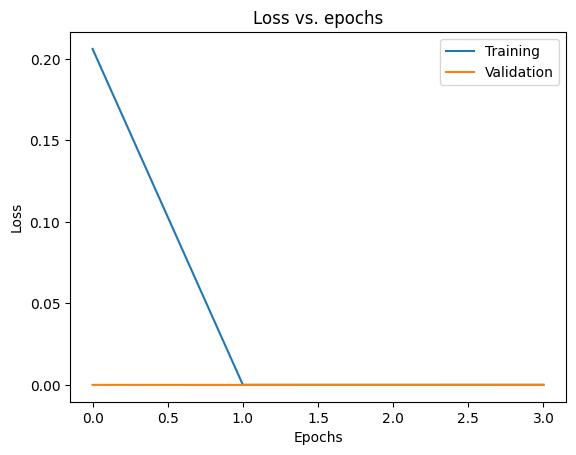

In [9]:
# Plotting the training loss and validation loss using matplotlib
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [10]:
# printing the loss and accuracy of the model using evaluate:
model.evaluate(validation_generator)

3/3 [==============================] - 55s 16s/step - loss: 1.6209e-05 - accuracy: 1.0000


[1.6209069144679233e-05, 1.0]

In [35]:
model.save('./fruits/ResNet50_model/ResNet50.h5')

1/1 [==============================] - 0s 310ms/step
Creating..../fruits/data/live/ResNet50/Banana10.jpg
class: 0
1/1 [==============================] - 0s 349ms/step
Creating..../fruits/data/live/ResNet50/Banana9.jpg
class: 0
1/1 [==============================] - 0s 323ms/step
Creating..../fruits/data/live/ResNet50/Banana8.jpg
class: 0
1/1 [==============================] - 0s 314ms/step
Creating..../fruits/data/live/ResNet50/Banana7.jpg
class: 0
1/1 [==============================] - 0s 366ms/step
Creating..../fruits/data/live/ResNet50/Banana6.jpg
class: 0
1/1 [==============================] - 0s 323ms/step
Creating..../fruits/data/live/ResNet50/Banana5.jpg
class: 0
1/1 [==============================] - 0s 348ms/step
Creating..../fruits/data/live/ResNet50/Banana4.jpg
class: 0
1/1 [==============================] - 0s 319ms/step
Creating..../fruits/data/live/ResNet50/Banana3.jpg
class: 0
1/1 [==============================] - 0s 356ms/step
Creating..../fruits/data/live/ResNet50/Ban

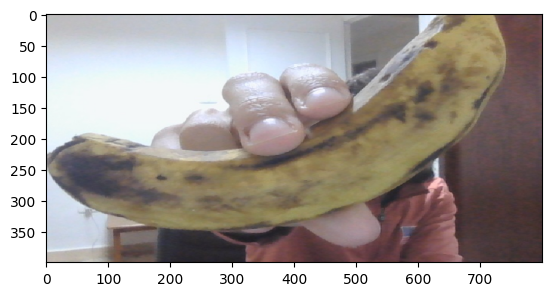

In [20]:
# Predicting the class of the test image using ResNet50 model we have now and show the image as well: "Banana testing"
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import time
cam_banana_live=cv2.VideoCapture(0)

i=10
m=0
success_of_banana_index = 0
success_of_banana=0
for m in range(10):
    frame = cam_banana_live.read()[1]
    name = './fruits/data/live/ResNet50/Banana'+str(i)+'.jpg'
    cv2.imwrite(name, frame)
    frame = cv2.resize(frame, (400,800))
    img=image.load_img(name, target_size=(400,800))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    predictions=model.predict(x)
    x=preprocess_input(x)
    print ('Creating...' + name)
    i-=1
    print('class:',np.argmax(predictions[0]))
    time.sleep(1)
    if np.argmax(predictions[0]) == success_of_banana_index:
        success_of_banana+=1
    else:
        continue 
    
print(success_of_banana)
cam_banana_live.release()
cv2.destroyAllWindows()
plt.imshow(img)

1/1 [==============================] - 0s 311ms/step
Creating..../fruits/data/live/ResNet50/Orange10.jpg
class: 0
1/1 [==============================] - 0s 368ms/step
Creating..../fruits/data/live/ResNet50/Orange9.jpg
class: 0
1/1 [==============================] - 0s 353ms/step
Creating..../fruits/data/live/ResNet50/Orange8.jpg
class: 1
1/1 [==============================] - 0s 340ms/step
Creating..../fruits/data/live/ResNet50/Orange7.jpg
class: 1
1/1 [==============================] - 0s 362ms/step
Creating..../fruits/data/live/ResNet50/Orange6.jpg
class: 1
1/1 [==============================] - 0s 335ms/step
Creating..../fruits/data/live/ResNet50/Orange5.jpg
class: 1
1/1 [==============================] - 0s 318ms/step
Creating..../fruits/data/live/ResNet50/Orange4.jpg
class: 1
1/1 [==============================] - 0s 324ms/step
Creating..../fruits/data/live/ResNet50/Orange3.jpg
class: 1
1/1 [==============================] - 0s 317ms/step
Creating..../fruits/data/live/ResNet50/Ora

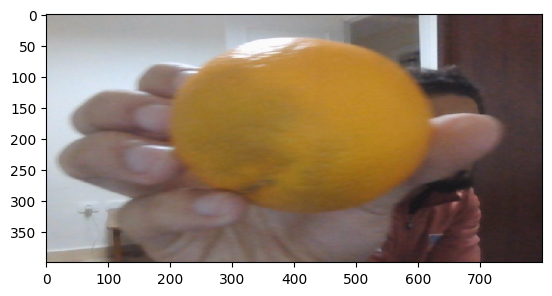

In [19]:
# Predicting the class of the test image using ResNet50 model we have now and show the image as well: "Orange testing"
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import time
cam_banana_live=cv2.VideoCapture(0)

i=10
m=0
success_of_orange_index = 1
success_of_orange=0
for m in range(10):
    frame = cam_banana_live.read()[1]
    name = './fruits/data/live/ResNet50/Orange'+str(i)+'.jpg'
    cv2.imwrite(name, frame)
    frame = cv2.resize(frame, (400,800))
    img=image.load_img(name, target_size=(400,800))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    predictions=model.predict(x)
    x=preprocess_input(x)
    print ('Creating...' + name)
    i-=1
    print('class:',np.argmax(predictions[0]))
    time.sleep(1)
    if np.argmax(predictions[0]) == success_of_orange_index:
        success_of_orange+=1
    else:
        continue 
    
print(success_of_orange)
cam_banana_live.release()
cv2.destroyAllWindows()
plt.imshow(img)

In [21]:
#Success rate
ResNet50_success_rate=(success_of_banana + success_of_orange)/20
print(ResNet50_success_rate)

0.85


1/1 [==============================] - 0s 332ms/step
Creating..../fruits/data/test/Banana/Banana509.jpg
class: 0
1/1 [==============================] - 0s 305ms/step
Creating..../fruits/data/test/Banana/Banana508.jpg
class: 0
1/1 [==============================] - 0s 310ms/step
Creating..../fruits/data/test/Banana/Banana507.jpg
class: 0
1/1 [==============================] - 0s 309ms/step
Creating..../fruits/data/test/Banana/Banana506.jpg
class: 0
1/1 [==============================] - 0s 304ms/step
Creating..../fruits/data/test/Banana/Banana505.jpg
class: 0
1/1 [==============================] - 0s 305ms/step
Creating..../fruits/data/test/Banana/Banana504.jpg
class: 0
1/1 [==============================] - 0s 316ms/step
Creating..../fruits/data/test/Banana/Banana503.jpg
class: 0
1/1 [==============================] - 0s 310ms/step
Creating..../fruits/data/test/Banana/Banana502.jpg
class: 0
1/1 [==============================] - 0s 303ms/step
Creating..../fruits/data/test/Banana/Banana

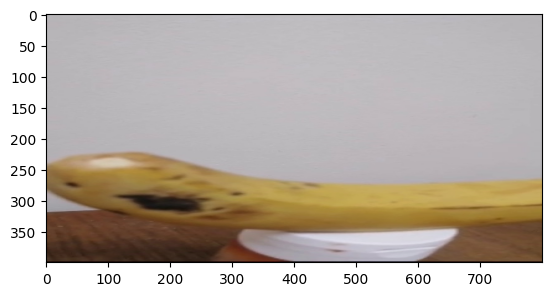

In [22]:
# Predicting the class of the test image using ResNet50 model we have now and show the image as well: "Banana testing"
# important note: it's not working with webcam live shots, I tested it using the tesing data: I think ResNet50 should give 100% success
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import time
# cam_banana_live=cv2.VideoCapture(0)

i=9
m=0
success_of_banana_index = 0
success_of_banana=0
for m in range(10):
    # frame = cam_banana_live.read()[1]
    # name = './fruits/data/live/ResNet50/Banana'+str(i)+'.jpg'
    name = './fruits/data/test/Banana/Banana50'+str(i)+'.jpg'
    # cv2.imwrite(name, frame)
    # frame = cv2.resize(frame, (400,800))
    img=image.load_img(name, target_size=(400,800))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    predictions=model.predict(x)
    x=preprocess_input(x)
    print ('Creating...' + name)
    i-=1
    print('class:',np.argmax(predictions[0]))
    time.sleep(1)
    if np.argmax(predictions[0]) == success_of_banana_index:
        success_of_banana+=1
    else:
        continue 
    
print(success_of_banana)
# cam_banana_live.release()
# cv2.destroyAllWindows()
plt.imshow(img)

1/1 [==============================] - 0s 318ms/step
Creating..../fruits/data/test/Orange/Orange509.jpg
class: 1
1/1 [==============================] - 0s 351ms/step
Creating..../fruits/data/test/Orange/Orange508.jpg
class: 1
1/1 [==============================] - 0s 313ms/step
Creating..../fruits/data/test/Orange/Orange507.jpg
class: 1
1/1 [==============================] - 0s 363ms/step
Creating..../fruits/data/test/Orange/Orange506.jpg
class: 1
1/1 [==============================] - 0s 298ms/step
Creating..../fruits/data/test/Orange/Orange505.jpg
class: 1
1/1 [==============================] - 0s 299ms/step
Creating..../fruits/data/test/Orange/Orange504.jpg
class: 1
1/1 [==============================] - 0s 297ms/step
Creating..../fruits/data/test/Orange/Orange503.jpg
class: 1
1/1 [==============================] - 0s 300ms/step
Creating..../fruits/data/test/Orange/Orange502.jpg
class: 1
1/1 [==============================] - 0s 326ms/step
Creating..../fruits/data/test/Orange/Orange

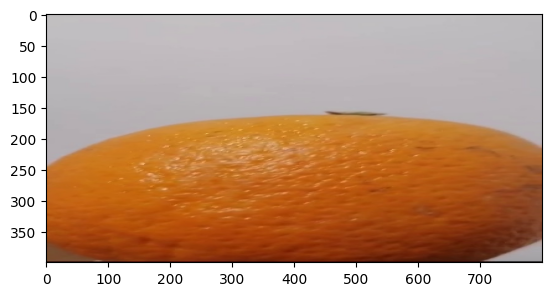

In [23]:
# Predicting the class of the test image using ResNet50 model we have now and show the image as well: "orange testing"
# important note: it's not working with webcam live shots, I tested it using the tesing data: I think ResNet50 should give 100% success
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import time
# cam_banana_live=cv2.VideoCapture(0)

i=9
m=0
success_of_orange_index = 1
success_of_orange=0
for m in range(10):
    # frame = cam_banana_live.read()[1]
    # name = './fruits/data/live/ResNet50/Banana'+str(i)+'.jpg'
    name = './fruits/data/test/Orange/Orange50'+str(i)+'.jpg'
    # cv2.imwrite(name, frame)
    # frame = cv2.resize(frame, (400,800))
    img=image.load_img(name, target_size=(400,800))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    predictions=model.predict(x)
    x=preprocess_input(x)
    print ('Creating...' + name)
    i-=1
    print('class:',np.argmax(predictions[0]))
    time.sleep(1)
    if np.argmax(predictions[0]) == success_of_orange_index:
        success_of_orange+=1
    else:
        continue 
    
print(success_of_orange)
# cam_banana_live.release()
# cv2.destroyAllWindows()
plt.imshow(img)

In [24]:
#Success rate
ResNet50_success_rate=(success_of_banana + success_of_orange)/20
print(ResNet50_success_rate)

1.0


# Success Rate Comparison:

ANN---> 70%

CNN---> 85%

ResNet50--->100%